In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

#Inspired by https://www.kaggle.com/code/mahmoudlimam/resampling-tutorial
# Importance measurement - f1 score (recall & precision)

y_col = "HeartDiseaseOrAttack"
colsToDrop = ["State"]

In [2]:
df = pd.read_csv('../data/heart_disease_health_indicators_BRFSS2021.csv')

for col in colsToDrop:
    df = df.drop(col, axis=1)

<AxesSubplot: xlabel='HeartDiseaseOrAttack', ylabel='count'>

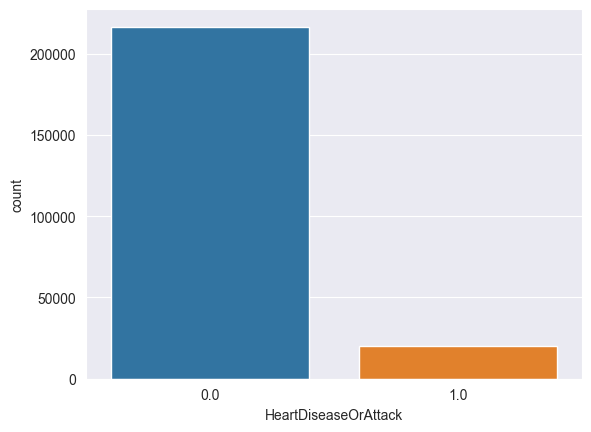

In [3]:
sns.countplot(data=df, x=y_col)

In [4]:
X = df.drop(y_col, axis=1)
y = df[y_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=45)

In [5]:
def train_evaluate(X_train, X_test, y_train, y_test, sampler=None):
    model = RandomForestClassifier(max_depth=6, n_jobs=-1, n_estimators=50, verbose=1)

    Xs_train, ys_train = X_train, y_train

    if sampler is not None:
        Xs_train, ys_train = sampler.fit_resample(X_train, y_train)

    model.fit(Xs_train, ys_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    print("Training Results:\n")
    print(classification_report(y_train, y_pred_train))
    print("\n\nTesting Results:\n")
    print(classification_report(y_test, y_pred_test))

In [6]:
# Without re-sampling
train_evaluate(X_train, X_test, y_train, y_test)

# With no re-sampling we get for test:
# Recall for 1.0 - 0.01
# Macro-Average F1 - 0.48

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Training Results:

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.96    194844
         1.0       0.75      0.00      0.01     18283

    accuracy                           0.91    213127
   macro avg       0.83      0.50      0.48    213127
weighted avg       0.90      0.91      0.87    213127



Testing Results:

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     21713
         1.0       0.67      0.00      0.00      1968

    accuracy                           0.92     23681
   macro avg       0.79      0.50      0.48     23681
weighted avg       0.90      0.92      0.88     23681



In [7]:
## -- Undersampling --

#Random Undersampling
from imblearn.under_sampling import RandomUnderSampler

sampler = RandomUnderSampler(random_state=11)

train_evaluate(X_train, X_test, y_train, y_test, sampler)

# Test Results:
# Recall for 1.0: 0.01 -> 0.83
# Macro-Average F1: 0.48 -> 0.58

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Training Results:

              precision    recall  f1-score   support

         0.0       0.98      0.72      0.83    194844
         1.0       0.22      0.83      0.34     18283

    accuracy                           0.73    213127
   macro avg       0.60      0.77      0.58    213127
weighted avg       0.91      0.73      0.79    213127



Testing Results:

              precision    recall  f1-score   support

         0.0       0.98      0.72      0.83     21713
         1.0       0.21      0.83      0.34      1968

    accuracy                           0.73     23681
   macro avg       0.59      0.77      0.58     23681
weighted avg       0.92      0.73      0.79     23681



In [8]:
import faiss

#https://towardsdatascience.com/k-means-8x-faster-27x-lower-error-than-scikit-learns-in-25-lines-eaedc7a3a0c8
# class FaissKMeans:
#     def __init__(self, n_clusters=8, n_init=10, max_iter=300):
#         self.n_clusters = n_clusters
#         self.n_init = n_init
#         self.max_iter = max_iter
#         self.kmeans = None
#         self.cluster_centers_ = None
#         self.inertia_ = None
#
#     def fit(self, X, y=None):
#         self.kmeans = faiss.Kmeans(d=X.shape[1],
#                                    k=self.n_clusters,
#                                    niter=self.max_iter,
#                                    nredo=self.n_init)
#         self.kmeans.train(X.astype(np.float32))
#         self.cluster_centers_ = self.kmeans.centroids
#         self.inertia_ = self.kmeans.obj[-1]
#
#     def predict(self, X):
#         return self.kmeans.index.search(X.astype(np.float32), 1)[1]
#
#     def get_params(self, deep=True):
#         out = dict()
#         out["n_clusters"] = self.n_clusters
#         out["n_init"] = self.n_init
#         out["max_iter"] = self.max_iter
#         return out
#
#     def set_params(self, **params):
#         for key, value in params.items():
#             setattr(self, key, value)
#         return self

In [9]:
# Cluster Centroid Undersampling
from imblearn.under_sampling import ClusterCentroids
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(verbose=1, batch_size=4096)
sampler = ClusterCentroids(estimator=kmeans)

train_evaluate(X_train, X_test, y_train, y_test, sampler)

# Test Results:
# Recall for 1.0: 0.01 -> 0.98
# Macro-Average F1: 0.48 -> 0.33

Init 1/3 with method k-means++


C:\VSCode\Uni\COM618-DataScience\Practice\01-ReadDataSet\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia for init 1/3: 362594.58290000015
Init 2/3 with method k-means++
Inertia for init 2/3: 359469.9026249998
Init 3/3 with method k-means++
Inertia for init 3/3: 360490.79259999975
[MiniBatchKMeans] Reassigning 2048 cluster centers.
Minibatch step 1/4756: mean batch inertia: 6.864443536376955
[MiniBatchKMeans] Reassigning 2048 cluster centers.
Minibatch step 2/4756: mean batch inertia: 6.933034379272461, ewa inertia: 6.933034379272461
[MiniBatchKMeans] Reassigning 2048 cluster centers.
Minibatch step 3/4756: mean batch inertia: 7.010121390869764, ewa inertia: 6.936275400591997
[MiniBatchKMeans] Reassigning 2048 cluster centers.
Minibatch step 4/4756: mean batch inertia: 6.9612399968652365, ewa inertia: 6.937325003982746
[MiniBatchKMeans] Reassigning 2048 cluster centers.
Minibatch step 5/4756: mean batch inertia: 7.177608512939774, ewa inertia: 6.947427405919547
[MiniBatchKMeans] Reassigning 2048 cluster centers.
Minibatch step 6/4756: mean batch inertia: 6.8025747681442965, ewa ine

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Training Results:

              precision    recall  f1-score   support

         0.0       0.99      0.30      0.46    194844
         1.0       0.12      0.98      0.21     18283

    accuracy                           0.36    213127
   macro avg       0.56      0.64      0.33    213127
weighted avg       0.92      0.36      0.44    213127



Testing Results:

              precision    recall  f1-score   support

         0.0       0.99      0.29      0.45     21713
         1.0       0.11      0.98      0.20      1968

    accuracy                           0.35     23681
   macro avg       0.55      0.64      0.33     23681
weighted avg       0.92      0.35      0.43     23681



In [40]:
## Oversampling

# Random Oversampling
from imblearn.over_sampling import RandomOverSampler
sampler = RandomOverSampler(random_state=11)

train_evaluate(X_train, X_test, y_train, y_test, sampler)
# Test Results:
# Recall for 1.0: 0.01 -> 0.83
# Macro-Average F1: 0.48 -> 0.59

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Training Results:

              precision    recall  f1-score   support

         0.0       0.98      0.72      0.83    194844
         1.0       0.22      0.83      0.34     18283

    accuracy                           0.73    213127
   macro avg       0.60      0.77      0.59    213127
weighted avg       0.91      0.73      0.79    213127



Testing Results:

              precision    recall  f1-score   support

         0.0       0.98      0.72      0.83     21713
         1.0       0.21      0.83      0.34      1968

    accuracy                           0.73     23681
   macro avg       0.60      0.78      0.59     23681
weighted avg       0.92      0.73      0.79     23681



In [42]:
#SMOTE Oversampling
from imblearn.over_sampling import SMOTE

sampler = SMOTE(k_neighbors=5, random_state=11)
train_evaluate(X_train, X_test, y_train, y_test, sampler)
# Test Results:
# Recall for 1.0: 0.01 -> 0.61
# Macro-Average F1: 0.48 -> 0.64

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Training Results:

              precision    recall  f1-score   support

         0.0       0.96      0.85      0.90    194844
         1.0       0.28      0.60      0.38     18283

    accuracy                           0.83    213127
   macro avg       0.62      0.73      0.64    213127
weighted avg       0.90      0.83      0.86    213127



Testing Results:

              precision    recall  f1-score   support

         0.0       0.96      0.86      0.91     21713
         1.0       0.28      0.61      0.38      1968

    accuracy                           0.84     23681
   macro avg       0.62      0.73      0.64     23681
weighted avg       0.90      0.84      0.86     23681



In [43]:
# Borderline SMOTE
from imblearn.over_sampling import BorderlineSMOTE
sampler = BorderlineSMOTE(k_neighbors=5, random_state=11)

train_evaluate(X_train, X_test, y_train, y_test, sampler)
# Test Results:
# Recall for 1.0: 0.01 -> 0.59
# Macro-Average F1: 0.48 -> 0.64

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Training Results:

              precision    recall  f1-score   support

         0.0       0.96      0.86      0.91    194844
         1.0       0.29      0.60      0.39     18283

    accuracy                           0.84    213127
   macro avg       0.62      0.73      0.65    213127
weighted avg       0.90      0.84      0.86    213127



Testing Results:

              precision    recall  f1-score   support

         0.0       0.96      0.86      0.91     21713
         1.0       0.28      0.59      0.38      1968

    accuracy                           0.84     23681
   macro avg       0.62      0.73      0.64     23681
weighted avg       0.90      0.84      0.86     23681



In [44]:
from smote_variants import DBSMOTE
oversampler = DBSMOTE(min_samples=10)

train_evaluate(X_train, X_test, y_train, y_test, sampler)
# Test Results:
# Recall for 1.0: 0.01 -> 0.6
# Macro-Average F1: 0.48 -> 0.64

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Training Results:

              precision    recall  f1-score   support

         0.0       0.96      0.85      0.90    194844
         1.0       0.28      0.61      0.38     18283

    accuracy                           0.83    213127
   macro avg       0.62      0.73      0.64    213127
weighted avg       0.90      0.83      0.86    213127



Testing Results:

              precision    recall  f1-score   support

         0.0       0.96      0.86      0.91     21713
         1.0       0.28      0.60      0.38      1968

    accuracy                           0.84     23681
   macro avg       0.62      0.73      0.64     23681
weighted avg       0.90      0.84      0.86     23681

